<a href="https://colab.research.google.com/github/dsaint31x/OpenCV_Python_Tutorial/blob/master/DIP/2021/%EC%9D%B4%EA%B0%80%EC%9D%80/211029_DIP_09_00_MorphologicalProcessing%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
url_b = 'https://t1.daumcdn.net/cfile/tistory/9983894C5B93B3AA04'
url = 'https://raw.githubusercontent.com/dltpdn/opencv-python_edu/master/img/moon_gray.jpg'

In [59]:
from urllib import request 

fstr = 'holes.jpg'
request.urlretrieve(url_b,fstr)
print('saved ok : holes.jpg')

fstr = "test.jpg" 
request.urlretrieve(url,fstr) 
print("저장되었습니다.")


saved ok : holes.jpg
저장되었습니다.


(900, 900)


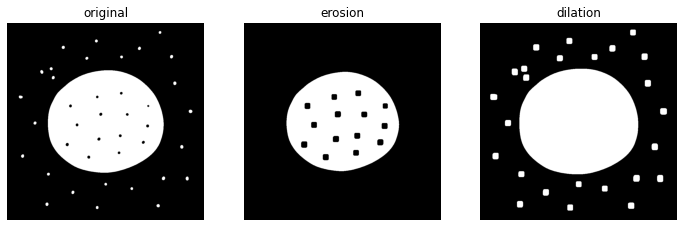

In [60]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('holes.jpg',cv2.IMREAD_GRAYSCALE)      # gray 로 앍움
_,img = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)    # binary 로 읽음 + OTSU 알고리즘..
print(img.shape)

# Moephological
k = cv2.getStructuringElement(cv2.MORPH_RECT, (15,15))        # RECT 사각형
erosion = cv2.erode(img, k)               # 침식
dilation = cv2.dilate(img, k)             # 확장, 구멍 메우다

plt.figure('src vs. erosion vs. dilation', figsize=(12,4))

plt.subplot(1,3,1)
plt.title("original")
plt.imshow(img,cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title("erosion")
plt.imshow(erosion,cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title("dilation")
plt.imshow(dilation,cmap='gray')
plt.axis('off')

plt.show()

# Opening vs. Closing

## Opening

`Erosion - Dilation`
* remove the noise of small size
* remove weak connections

## Closing

`Dilation - Erosion`
* fill a small gap
* strengthen connections


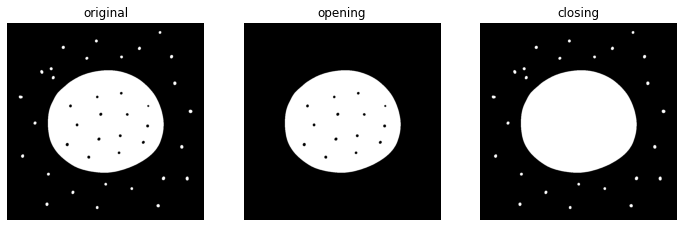

In [61]:
opening = cv2.morphologyEx(img,cv2.MORPH_OPEN,k)          # 침식 -> 확장    밝아짐
closing = cv2.morphologyEx(img,cv2.MORPH_CLOSE,k)         # 확장 -> 침식    어두워짐
# k  중요

plt.figure('ori vs. open vs. close', figsize=(12,6))
plt.subplot(1,3,1)
plt.title("original")
plt.axis('off')
plt.imshow(img,cmap='gray')

plt.subplot(1,3,2)
plt.title("opening")
plt.axis('off')
plt.imshow(opening,cmap='gray')

plt.subplot(1,3,3)
plt.title("closing")
plt.axis('off')
plt.imshow(closing, cmap='gray')

plt.show()

In [62]:
 cv2.morphologyEx?
 # 그레이디언트는 밝은 영역의 가장자리를 분리하며 그레이스케일 이미지가 가장 급격하게 변하는 곳에서 가장 높은 결과를 반환
 # cv2.morphologyEx(원본 배열, 연산 방법, 구조 요소, 고정점, 반복 횟수, 테두리 외삽법, 테두리 색상)

## gradient=dilate(src)−erode(src)
#### 엣지를 검출할 때 사용

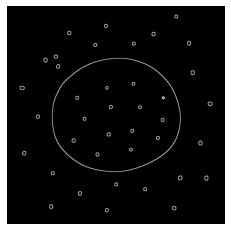

In [63]:
k_np = np.full(shape=(3,3),fill_value=255,dtype=np.uint8)

# Boundary detection

# k 랑 무슨 차이냐 ?
# k_np 는 0~1 이 아닌 255

gradient = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,k_np)
plt.imshow(gradient, cmap='gray')
plt.axis('off')
plt.show()

# Tophat vs. Blackhat

## Tophat

`Original - Opening`
* strength region having higher intensity than neighbors
* 입력 이미지의 객체들이 제외되고 국소적으로 밝았던 부분들이 분리
* 주변에 비해 밝은(높은) intensity 를 가지는 부분들이 강조됨
* 밝기 값 크게 변화하는 영역 강조

# 밝은 애가 없어지넹

## Blackhat

`Original - Closing`
* strength region having lower intensity than neighbors
* 입력 이미지의 객체들이 제외되고 국소적으로 어두웠던 홀들이 분리
* 어두운 부분 강조

# 어두운게 없어지누

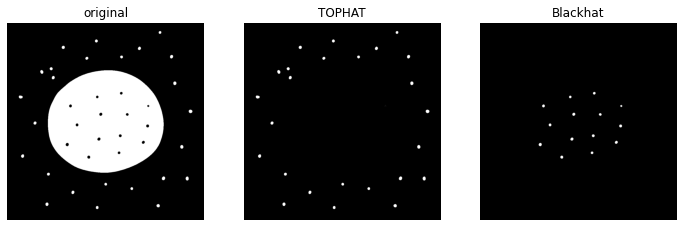

In [64]:
tophat = cv2.morphologyEx(img,cv2.MORPH_TOPHAT, k)
blackhat = cv2.morphologyEx(img,cv2.MORPH_BLACKHAT, k)

plt.figure('src vs. tophat vs. blackhat',figsize=(12,4))
plt.subplot(1,3,1)
plt.title("original")
plt.axis('off')
plt.imshow(img,cmap='gray')

plt.subplot(1,3,2)
plt.title("TOPHAT")
plt.axis('off')
plt.imshow(tophat,cmap='gray')

plt.subplot(1,3,3)
plt.title("Blackhat")
plt.axis('off')
plt.imshow(blackhat,cmap='gray')

plt.show()

In [65]:
import cv2
import numpy as np

img = cv2.imread('test.jpg',cv2.IMREAD_GRAYSCALE)
print(img.shape)
k = cv2.getStructuringElement(cv2.MORPH_RECT,(9,9))

tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, k)

blackhat= cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, k)

(424, 410)


In [66]:
k

array([[1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=uint8)

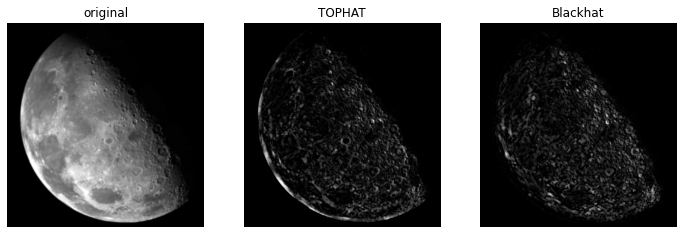

In [67]:
import matplotlib.pyplot as plt

plt.figure('src vs. tophat vs. blackhat',figsize=(12,4))
plt.subplot(1,3,1)
plt.title("original")
plt.axis('off')
plt.imshow(img, cmap='gray')

plt.subplot(1,3,2)
plt.title("TOPHAT")
plt.axis('off')
plt.imshow(tophat,cmap='gray')

plt.subplot(1,3,3)
plt.title("Blackhat")
plt.axis('off')
plt.imshow(blackhat,cmap='gray')

plt.show()

(424, 410)
255 0
44 0
26 0


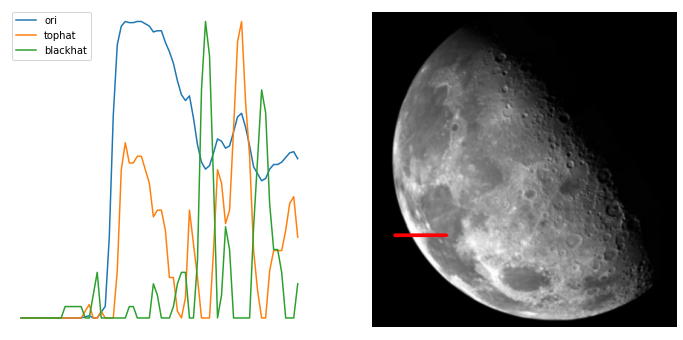

In [68]:
print(img.shape)

def m_n_norm(data) :
  min = np.min(data)
  max = np.max(data)
  print(max,min)
  ret = (data-min)/(max-min)
  return ret

plt.figure('tophat and blackhat',figsize=(12,6))

plt.subplot(1,2,1)
plt.axis('off')
plt.plot(m_n_norm(img[300,30:100]),label='ori')
plt.plot(m_n_norm(tophat[300,30:100]),label='tophat')
plt.plot(m_n_norm(blackhat[300,30:100]),label='blackhat')
plt.legend()

plt.subplot(1,2,2)
img_display = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
cv2.line(img_display, (30,300), (100,300), (255,0,0), 3)
plt.axis('off')
plt.imshow(img_display)

plt.show()

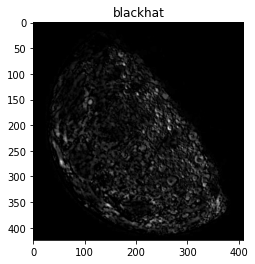

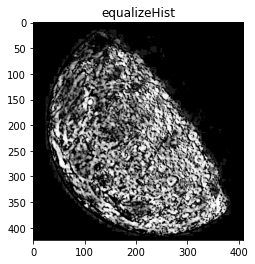

In [77]:
# tl = np.log(blackhat).astype(np.float)
tl = blackhat
tl = cv2.cvtColor(tl, cv2.COLOR_GRAY2BGR)

tl = cv2.cvtColor(tl,cv2.COLOR_BGR2HSV)

tl[:,:,2] = cv2.equalizeHist(tl[:,:,2])
tl = cv2.cvtColor(tl,cv2.COLOR_HSV2RGB)

plt.figure('ori')
plt.title("blackhat")
plt.imshow(blackhat,cmap='gray')

plt.figure('he')
plt.title("equalizeHist")
plt.imshow(tl)

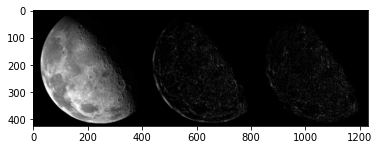

In [78]:
merged = np.hstack((img,tophat,blackhat))

import matplotlib.pyplot as plt
plt.imshow(merged,cmap='gray')

# Interpolation (보간)
* measure 되지 못한 or 모르는 pixel (or sample) 의 값을 주변의 pixel (or sample) 들을 이용하여 구하는 과정

## Nearest Neighbor Interpolation
* = Zero order interpolation
* 가장 가까운 pixel 의 값으로 추정
* 빠르지만, 영상 질 좋지 않음

## Bilinear Interpolation
* = First order interpolation
* 인접한 4개의 pixel을 이용하여 해당 intensity와 pixel 과의 거리 이용하여 추정

## Bicubic Interpolation
* 3rd-order spline interpolation
* 축 하나에서 cubic interpolation 수행경우, 4개 pixel 사용

## B-Spline Interpolation
* 스플라인 곡선 (spline surve) 은 주어진 복수의 제어점을 통과하는 부드러운 곡선
* 인접한 두 점 사이에의 구간마다 별도의 다항식을 이용해 곡선 정의함
* 테일러 급수가 어디에 쓰이는지 ???????

## Matching
* 어떤 대상을 다른 대상과 비교하여, 그들이 같은지 다른지를 알아내는 과정
* similarity, 클수록 같은 물체일 확률 증가
* Distance, 작을수록 같은 물체일 확률 증가

* 쓰이는 곳 ---> Object Localization(위치찾기), Object Recognition(객체인식)

## Distance
* 많은 경우, local feature 들은 multi-dimensional vector
### L2 Norm
* vector의 차이는, 흔히 이들 vector를 d-차원의 공간에 존재하는 postion vector로 여김
### Mahalanobis Distance
* 데이터의 확률분포 고려

## SSIM (Structrual Similarity Index Measure)
* 기존의 mse 방법과 ㅏ달리 이미지의 조명, 대비, 구조적 특징 고려하여 similarity 측정

## Stragety and Performance Evaluation for Matching
* Object Recognition(물체인식) 이나 증강현실 (장면영상에서 model에 matching 되는 객체 찾음) 경우
* -> Model : key point 적은편
* -> 장면영상 : 매우 많은 object 와 다양한 배경 혼재


### Fixed Thresholding

## Nearest Neighbor Searching
* Linear search, k-d tree, Locality Sensitive Hasing

---

# 20211029 영상처리 과제

# DISTANCE, SSIM (파라미터 조사)

# 둘의 차이 알아보기

# SSIM 클수록 좋은데 이유는 무엇?

# SSIM Library 조사
